# Pandas 데모 - Exploratory Data Analysis

## 라이브러리 import 및 설정

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Pandas를 실습해보기에 앞서, 노트북 내에서 환경 설정 방법에 대해 알아보겠습니다. 먼저 `autoreload`는 셀 실행을 할 때 마다 자동적으로 필요한 라이브러리들을 불러오게 해주는 기능입니다. `autoreload`는 주피터 노트북에서 기본적으로 제공하는 기능이기 때문에 `%reload_ext autoreload`를 통해 불러올 수 있습니다. 해당 기능을 사용하면 노트북 실행 후 이후에 설치한 라이브러리, 또는 라이브러리의 코드를 고친 수정된 라이브러리를 셀 실행 전에 자동으로 불러와 줍니다. 

`%reload_ext autoreload`를 통해 `autoreload`를 불어온 후에는 레벨을 지정해줘야 하는데 보통 2로 지정합니다. `%matplotlib inline`코드는 시각화한 차트들을 노트북 상에서 보여주게 하는 코드입니다. 다음 셀에서는 실습에 필요한 라이브러리들을 불러오겠습니다. 

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import warnings

`matplotlib`은 파이썬에서 데이터 시각화를 할 때 사용하는 라이브러리입니다. 

`numpy`는 파이썬에서 행렬간 연산, 벡터간 연산 등의 선형대수학과 관련된 연산을 지원하는 라이브러리 입니다. 관련해서 4장에서 깊게 다뤄보겠습니다. 

`pathlib`은 파일 경로에 대한 처리를 편하게 해주는 라이브러리입니다. 

`pandas`는 앞서 3장에서 확인한 라이브러리이며 이번 실습에 중심적으로 다뤄볼 예정입니다. 

`seaborn`은 `matplotlib`보다 더 퀄리티 있는 시각화를 지원하는 라이브러리입니다. 

`warnings`은 노트북 실행 시 출력되는 여러 경고 문구들을 제거할 때 사용하는 라이브러리입니다. 

아래 셀에서는 시각화와 데이터프레임과 관련된 기본 환경 설정을 진행하겠습니다.

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')



`rcParams['figure.figsize']`은 시각화 차트의 크기를 설정하는 환경 변수입니다. `(16, 8)`로 설정함으로써 기본적으로 출력되는 차트의 크기를 설정할 수 있습니다. 

`plt.style.use()`명령어는 시각화 차트의 스타일을 설정하는 명령어 입니다. 이번 실습에서는 `fivethirtyeight` 스타일로 설정을 했습니다. 

`pd.set_option()`는 pandas와 관련된 설정을 하는 명령어 입니다. `max_columns`는 한 화면에서 데이터프레임이 보여주는 열의 개수를 설정하는 옵션이며 `pd.set_options('max_columns', 100)`을 통해 최대 100개의 열까지 출력하도록 설정합니다. 

`display.precision`은 보여주는 소수점의 개수를 조정하는 옵션입니다. `pd.set_options('display.precision', 4)`를 통해 소수점 4째자리까지 화면에 보여주도록 설정합니다. 

`warnings.simplefilter('ignore')`은 모든 경고 문구를 무시하도록 설정하는 명령어입니다. 


## 데이터 다운로드

데이터는 [Dacon 단국대 소/중 데이터 분석 AI 경진대회 웹사이트](https://www.dacon.io/competitions/official/235638/data/)에서 다운로드 받아 `../input` 폴더에 저장합니다. `../`은 상위 폴더를 뜻합니다. 예를들어 폴더 구조를 구조화해서 보여드리면 아래와 같습니다. 

```
dku-kaggle
 L notebook
  L 03-pandas-eda.ipynb
 L input
  L train.csv
  L test.csv
  L sample_submission.csv
```


In [4]:
!ls -alF ../input/

total 187544
drwxr-xr-x@  5 jeong  staff       160 Sep  7 22:28 ./
drwxr-xr-x  13 jeong  staff       416 Sep  6 22:22 ../
-rw-rw-r--@  1 jeong  staff    800010 Jul 26 04:35 sample_submission.csv
-rw-rw-r--@  1 jeong  staff  18936246 Jul 26 04:35 test.csv
-rw-rw-r--@  1 jeong  staff  76278443 Jul 26 04:35 train.csv


주피터 노트북에서는 `!`를 통해 터미널 명령어를 직접 실행할 수 있습니다. 터미널의 `ls` 명령어를 통해 특정 폴더내에 있는 파일을 모두 확인할 수 있습니다. `-alF`는 `ls`가 입력 받는 옵션들이며 어떤 형태로 결과물을 출력할 지 결정합니다. 자세한 사항은 [명령어 메뉴얼 페이지](https://linuxcommand.org/lc3_man_pages/ls1.html)에서 확인 가능합니다. 

결론적으로 `!ls -alF ../input/` 명령어를 통해 `../input/`폴더 내에 train.csv, test.csv, sample_submission.csv 파일이 존재함을 확인할 수 있습니다.  

다음 셀에서는 각 파일에 접근할 수 있는 경로 정보를 변수에 저장하겠습니다. 

In [5]:
data_dir = Path('../input/')
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
feature_file = data_dir / 'feature.csv'
seed = 42

우선 `../input/`폴더를 기본 경로로 `data_dir`변수에 저장합니다. 그리고 해당 폴더 내에 존재하는 `train.csv`와 `test.csv`를 각각 경로에 추가해 `trn_file`과 `tst_file`변수에 저장합니다. `feature.csv`파일은 추후 데이터 탐색을 마치고 생성한 feature들이 저장될 파일입니다. 그래서 해당 파일 경로를 `feature_file`변수에 저장합니다. `seed`는 데이터 샘플링 시 사용할 랜덤 시드 숫자 입니다. 

```{note}
경로를 지정할 때 pathlib 라이브러리의 Path() 함수를 사용하는 이유는 어느 운영체제에서나 오류 없이 경로가 작동하도록 하기 위함입니다. 윈도우즈에서는 경로를 백슬래쉬(\)를 통해 입력 받고 리눅스에서는 슬래쉬(/)를 통해 입력 받기 때문입니다. 

참고: https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f
```

## EDA

### 학습데이터 로드

아래 코드를 활용해 학습데이터를 불러오겠습니다. 

In [6]:
trn = pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


`pd.read_csv()`함수에 파일 경로가 저장된 변수인 `trn_file`을 입력해서 학습데이터를 불러올 수 있습니다. 이 때 `index_col`을 지정해서 어떤 열을 인덱스로 사용할 지 지정할 수 있습니다. 지정을 하지 않으면 pandas에서 새로운 인덱스를 0부터 시작해서 생성합니다. 실습에 사용할 `train.csv`의 첫번째 열은 `id`정보를 지니고 있습니다. 해당 열을 인덱스로 사용하기 위해서 첫번째 열을 지칭하는 숫자 0을 `index_col`에 입력합니다. 

불러온 데이터를 `trn`변수에 저장하고 `trn.shape`을 입력하면 데이터프레임의 행의 개수와 열의 개수를 반환합니다. `trn` 데이터에는 320,000개의 행과 19개의 열이 존재함을 알 수 있습니다. 

또한 `trn.head()`는 데이터프레임의 상위 5개의 행을 반환합니다. `u`부터 `class`까지 총 19개의 열이 있음을 확인할 수 있으며, 이 때 `class`는 이번 실습에서 예측해야 할 타겟 변수입니다. 



In [7]:
trn.tail()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
319995,18.3656,17.2409,16.7739,16.4850,16.3404,5.1988e-02,18.1328,17.0406,16.6374,16.3861,16.2874,2,2,1.0930,1.0888,1.0973,1.0951,1.0909,2
319996,18.6856,17.6658,17.1904,16.8169,16.6367,8.7261e-02,18.5207,17.5131,17.0871,16.7436,16.6017,2,2,1.0517,1.0508,1.0526,1.0522,1.0513,1
319997,21.1890,18.4234,17.2956,16.9011,16.6841,-1.0148e-05,20.9890,18.3076,17.2152,16.8403,16.6355,31,30,1.1933,1.1941,1.1925,1.1929,1.1937,0
319998,18.8472,17.3186,16.5057,16.1806,15.9116,-4.5209e-05,16.3900,15.4058,15.1823,15.1969,15.1793,1,1,1.1725,1.1726,1.1725,1.1725,1.1725,0
319999,19.8604,18.8199,18.5156,18.4149,18.3080,-9.6544e-04,19.8256,18.7819,18.4908,18.3987,18.3098,1,1,1.0571,1.0562,1.0580,1.0575,1.0567,0


`trn.tail()`명령어을 통해 하위 5개의 행을 확인할 수 있습니다. 인덱스가 0부터 시작해서 319999까지 있기 때문에 총 320,000개의 행이 존재함을 재확인할 수 있습니다. 

### 데이터 개요

In [8]:
trn.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,3.2000e+05,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000
mean,19.8524,18.3768,17.7358,17.1742,16.8752,5.8308e-02,19.6289,18.2271,17.6154,17.1523,16.8693,6.3327,6.1388,1.1758,1.1765,1.1751,1.1754,1.1761,1.1163
std,1.9455,31.1108,1.4662,52.5615,57.1463,5.7546e-01,1.9236,17.7866,1.4730,25.0758,35.4365,8.8811,8.5516,0.1163,0.1181,0.1147,0.1155,0.1172,0.9235
min,-17.6875,-17555.3656,7.7314,-23955.8178,-23955.8178,-1.6605e+02,-42.8375,-9999.0000,-16.3802,-9999.0000,-9999.0000,1.0000,1.0000,1.0001,1.0000,1.0002,1.0001,1.0000,0.0000
25%,18.7242,17.4749,16.8772,16.5239,16.2889,3.5580e-05,18.5636,17.3484,16.7871,16.4530,16.2341,1.0000,1.0000,1.0882,1.0884,1.0878,1.0880,1.0883,0.0000
50%,19.4194,18.1405,17.5258,17.1497,16.9176,4.7129e-02,19.2646,18.0224,17.4434,17.0874,16.8694,2.0000,2.0000,1.1793,1.1792,1.1794,1.1794,1.1793,1.0000
75%,20.4321,19.0732,18.4281,18.0074,17.7289,9.4597e-02,20.1976,18.8884,18.2911,17.9070,17.6557,5.0000,5.0000,1.2275,1.2260,1.2292,1.2286,1.2268,2.0000
max,58.6233,46.3383,72.0097,50.1641,52.6127,6.2323e+01,30.7779,30.6132,31.9572,32.0162,30.7813,44.0000,42.0000,2.0508,2.0803,2.0221,2.0363,2.0654,2.0000


Pandas에서 제공하는 함수 중 `describe()`를 사용하면 데이터의 전반적인 개요를 보여줍니다. `trn.describe()`통해 반환된 결과를 확인해보면 `u` 컬럼에 320,000개의 값이 존재하며 해당 값들의 평균이 19.8524이고, 표준편차가 1.9455이며 최솟값이 -17.6875이다 라는 내용을 확인할 수 있습니다. 그래서 특정 열에 저장된 값들에 대한 개요을 빠르게 확인할 수 있습니다. 

In [9]:
trn.dtypes

u            float64
g            float64
r            float64
i            float64
z            float64
redshift     float64
dered_u      float64
dered_g      float64
dered_r      float64
dered_i      float64
dered_z      float64
nObserve       int64
nDetect        int64
airmass_u    float64
airmass_g    float64
airmass_r    float64
airmass_i    float64
airmass_z    float64
class          int64
dtype: object

각 열의 데이터 타입을 확인하기 위해선 `.dtypes`명령어를 사용합니다. `u`, `g`, `r`, `i`, `z`는 실수형(float64) 임을 알 수 있고 `nObserve`, `nDetect`, `class`는 정수형(int64) 값을 가지고 있는것을 확인할 수 있습니다. 데이터 타입은 문자열, 날짜형 등 여러개가 존재하지만 `trn`데이터에는 실수형과 정수형만 존재합니다. 

### 종속변수 분포

이번 실습 데이터를 분석할 때 가장 관심의 대상이 되는 변수는 종속변수인 `class`입니다. 최종적으로 모델을 만들어 `class`를 예측해야 하기 때문입니다. 

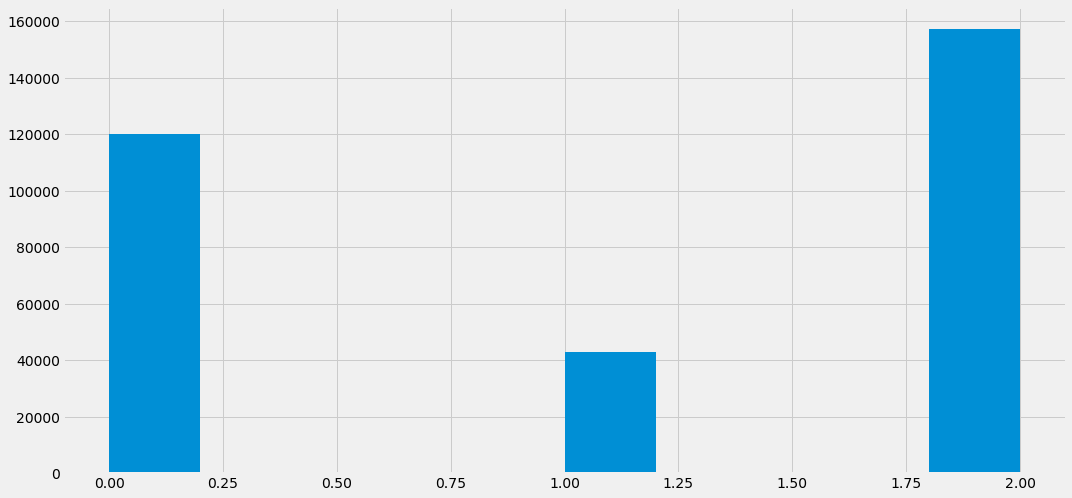

In [10]:
trn['class'].hist()

종속변수가 어떤 분포를 가지고 있는지 확인하고 싶을 때 단순하게 히스토그램을 그릴 수 있습니다. 원하는 열을 `[]`로 선택한 뒤 `.hist()`명령어를 통해 히스토그램을 그릴 수 있습니다. 히스토그램에서 막대그래프의 크기는 해당 값의 개수를 뜻합니다. `class`에는 2가 가장 많이 존재하며 1이 가장 적게 존재함을 확인할 수 있습니다. 

In [13]:
trn['class'].value_counts().sort_index()

0    119996
1     42785
2    157219
Name: class, dtype: int64

각 값에 대한 구체적인 수치를 확인하고 싶다면 `.value_counts()`함수를 사용하면 됩니다. 해당 함수를 실행하면 0이 119,996개 존재하며 1이 42,785개 존재하며 2가 152,219개 존재함을 알 수 있습니다. `value_counts()`함수만 사용하면 값의 개수를 기준으로 내림차순으로 정렬이 됩니다. 인덱스 값을 기준으로 내림차순 정렬을 해주기 위해 `.sort_index()`를 추가적으로 사용합니다. 

### 독립변수 분포

독립변수에 대한 데이터 탐색도 종속변수 탐색시 사용한 과정과 유사하게 진행할 수 있습니다.

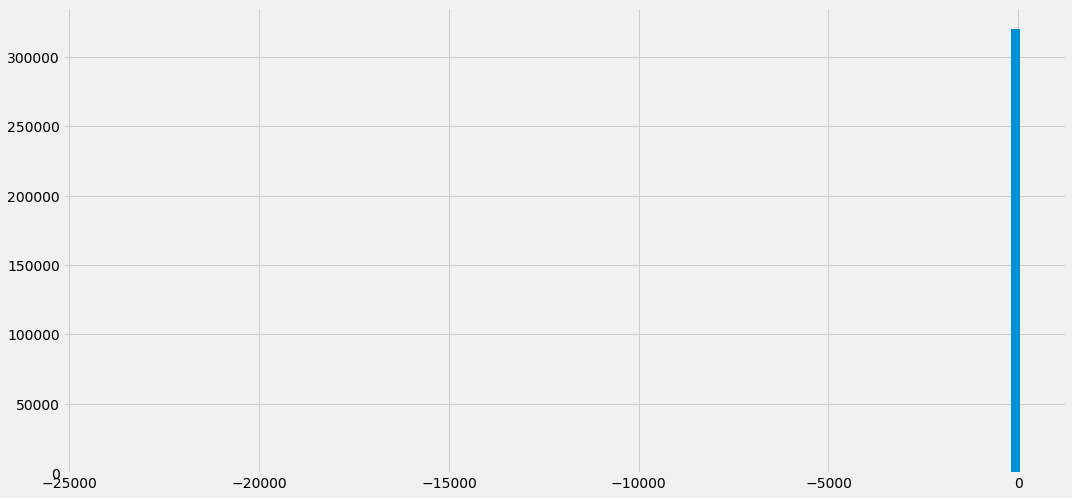

In [14]:
trn['i'].hist(bins=100)

`i`열의 분포를 알고 싶을 때 위와 같이 `i`컬럼을 선택한 후 `hist()`함수를 사용하면 됩니다. 이 때 `bins`는 히스토그램을 그릴 시 사용할 막대의 개수를 뜻합니다. 현재 100개의 막대를 활용해 히스토그램을 그렸으며 대부분의 값이 0에 집중되어 있는 것을 확인할 수 있습니다. 다른 범위에 있는 값은 상대적으로 적어서 막대의 크기가 작아 현재 그래프에는 가시적으로 보이지 않습니다. 최솟값은 대략 -25,000에 위치하고 있음을 알 수 있습니다. 

In [15]:
trn['i'].quantile(np.arange(0, 1, .01))

0.00   -23955.8178
0.01       14.4575
0.02       14.8731
0.03       15.0952
0.04       15.2494
           ...    
0.95       19.6769
0.96       19.8682
0.97       20.0562
0.98       20.2517
0.99       20.6046
Name: i, Length: 100, dtype: float64

만약 특정 열에 존재하는 값의 백분위수를 확인하고 싶을 때는 `.quantile()`함수를 사용하면 됩니다. 해당 함수의 파라미터로는 확인하고자 하는 백분위 지점을 지정해줍니다. 예를 들어 `np.arange(0, 1, .01)`함수는 0 부터 1까지 0.01 씩 증가하는 수들을 반환해줍니다. 그래서 위 셀에서는 `i`컬럼의 존재하는 값들을 차례대로 나열했을 때 0%  지점에 있는 값, 1% 지점에 있는 값, 2% 지점에 있는 값 부터 해서 99% 지점에 있는 값까지 출력된 것을 확인할 수 있습니다. 

결과를 확인해보면 최솟값은 -23,955이지만 그 외의 대부분의 값은 14와 20사이에 존재하는 것을 확인할 수 있습니다. 그렇다면 얼마나 많은 값이 음수인지 확인하고자 할 때는 아래 코드를 활용하면 됩니다.  

In [17]:
trn.loc[trn['i'] < 0]

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
107428,19.3774,18.2789,17.9404,-23955.8178,-23955.8178,0.0671,19.1142,18.1270,17.8280,-9999.0000,-9999.0000,5,4,1.3060,1.3121,1.3002,1.3031,1.3090,2
134102,18.0590,19.3009,19.0443,-5.4550,13.4289,0.0349,18.0384,19.4843,19.3937,23.6095,24.1169,1,1,1.0693,1.0710,1.0678,1.0685,1.0701,2
173287,19.9833,-17555.3656,17.9093,-17555.3656,-17555.3656,0.0932,19.7719,-9999.0000,17.8146,-9999.0000,-9999.0000,5,4,1.3061,1.3121,1.3002,1.3031,1.3090,1
181371,14.6680,14.0357,13.7587,-23.9024,13.5329,0.0007,14.5893,13.9768,13.7133,24.4559,13.5264,2,2,1.2933,1.2867,1.3000,1.2966,1.2900,1


`i`열에 있는 값이 0보다 작은 모든 행을 확인하고자 할 때는 `trn[`i`] < 0` 조건문을 형성한 후 `loc[]`를 활용하면 됩니다. 결과를 확인해 보면 총 320,000개의 행 중에서 4개 행만 `i`열에 음수가 존재함을 알 수 있습니다. 

`i`열과 이름이 유사한 열로 `dered_i`열이 있습니다. `dered_i`열의 값 분포 또한 `i`열과 유사한지 확인해보기 위해 아래 코드를 활용해서 백분위수를 탐색해보겠습니다. 

In [18]:
trn['dered_i'].quantile(np.arange(0, 1, .01))

0.00   -9999.0000
0.01      14.1238
0.02      14.6338
0.03      14.9256
0.04      15.1070
          ...    
0.95      19.6019
0.96      19.7939
0.97      19.9848
0.98      20.1736
0.99      20.5396
Name: dered_i, Length: 100, dtype: float64

`i`열과 마찬가지로 0%에 해당하는 값은 음수이며 1% 부터 99%에 해당하는 값은 14부터 20사이의 값 임을 알 수 있습니다. 두 개의 열의 값의 분포가 유사함을 알 수 있습니다. 다음 셀에서는 `dered_i`열에 존재하는 음수 값의 개수를 확인해보겠습니다. 

In [19]:
trn.loc[trn['dered_i'] < 0]

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
75409,24.0610,23.8879,20.5890,18.1014,16.4314,1.6993e-04,-30.6337,-18.6560,-8.7560,-3.6973,0.2159,11,8,1.1858,1.1859,1.1859,1.1858,1.1858,0
107428,19.3774,18.2789,17.9404,-23955.8178,-23955.8178,6.7144e-02,19.1142,18.1270,17.8280,-9999.0000,-9999.0000,5,4,1.3060,1.3121,1.3002,1.3031,1.3090,2
173287,19.9833,-17555.3656,17.9093,-17555.3656,-17555.3656,9.3168e-02,19.7719,-9999.0000,17.8146,-9999.0000,-9999.0000,5,4,1.3061,1.3121,1.3002,1.3031,1.3090,1
203328,19.1628,17.7936,16.2919,15.1547,14.2541,2.1426e-04,-35.8185,-25.0458,-13.3443,-6.8683,-2.1271,10,9,1.2710,1.2660,1.2762,1.2735,1.2685,0
218728,22.2886,19.7721,17.6775,16.3672,15.1206,1.6016e-04,-41.0768,-29.4654,-16.3802,-8.9412,-3.7059,6,4,1.1851,1.1852,1.1852,1.1851,1.1852,0
294574,22.7283,20.9049,19.4225,17.8771,17.0411,-7.0816e-06,-42.8375,-30.3208,-16.0172,-8.4604,-2.5462,5,3,1.2579,1.2533,1.2627,1.2603,1.2556,0
295627,23.5286,20.9588,19.4514,17.8901,17.0632,-2.0197e-05,-42.8375,-30.3208,-16.0172,-8.4604,-2.5462,5,3,1.2579,1.2533,1.2627,1.2603,1.2556,0


`dered_i`열에 존재하는 음수 값은 7개로 `i`열보다는 음수 값의 개수가 많은 것을 알 수 있습니다. 이렇게 조건문과 `loc[]`기능을 활용해 특정 조건에 맞는 데이터만 추출해서 확인할 수 있습니다. 

### 시각화

데이터 탐색을 할 때 가장 많이 사용하는 것이 시각화 입니다. 일반적으로 수치값을 하나씩 보는 것 보다 시각화된 그림을 보면 데이터에 존재하는 패턴을 쉽게 알아볼 수 있습니다. 

`trn`데이터에는 32만개의 행이 존재하는데, 해당 행을 모두 시각화 하면 가시적으로 확인하기도 어렵고 그림을 표출하는데 시간이 오래 걸립니다. 그래서 시각화 할 때는 데이터 샘플링을 통해 시각화 하고자하는 데이터 크기를 줄여서 진행하는 것이 효율적입니다. 

In [20]:
trn_sample = trn.sample(n=10000, random_state=seed)

Pandas에서는 `sample()` 함수를 활용해 쉽게 데이터를 샘플링할 수 있습니다. 위 예시에서는 1만개의 행을 샘플링 한 예시입니다. 샘플링은 랜덤하게 이뤄지는데 랜덤한 경우를 어느 정도 제어하기 위해서 시드(seed)값을 줄 수 있습니다. 앞에서 `seed`변수에 42를 저장했기 때문에 해당 값으로 시드값을 고정시켜 두고 데이터를 1만개 추출한 것을 `trn_sample`변수에 저장했습니다. 

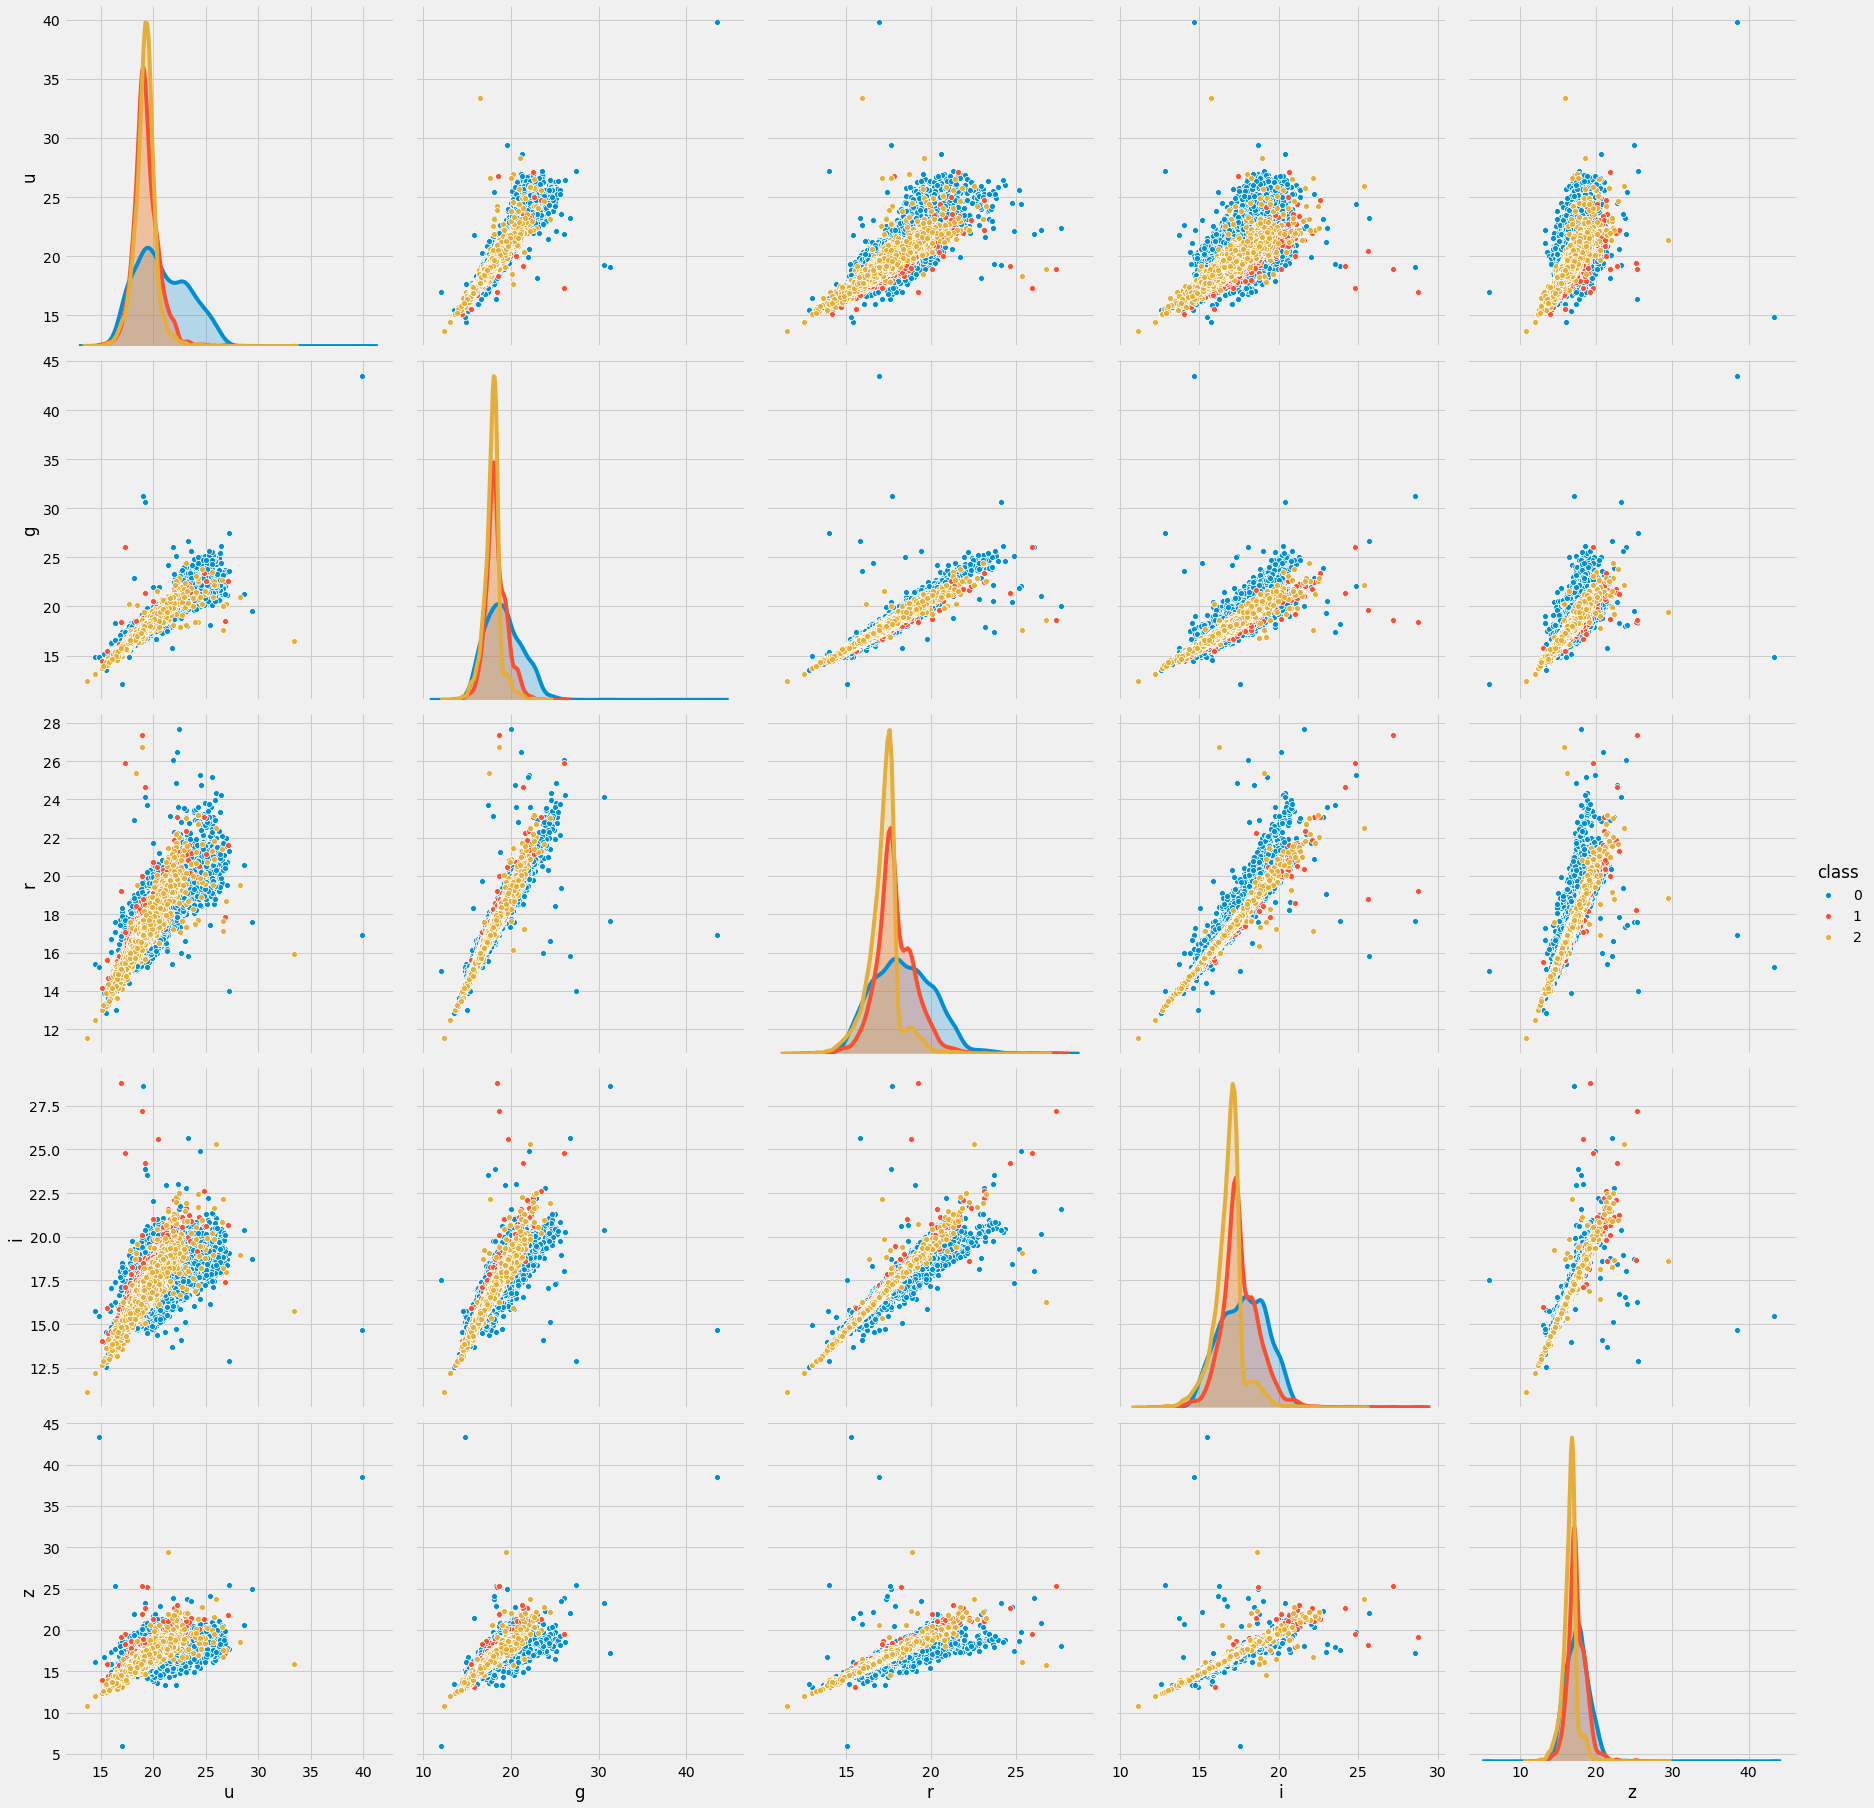

In [21]:
sns.pairplot(data=trn_sample, vars=['u', 'g', 'r', 'i', 'z'], hue='class', size=5)

시각화할 때 유용한 함수로 seaborn 라이브러리에서 제공하는 `pairplot()`함수가 있습니다. 해당 함수에 5개의 열을 입력하고 종속변수를 명시하면 5개 열에 대한 분포와 종속변수 간의 상관관계를 그래프로 나타냅니다. 

x축은 왼쪽 부터 `u`, `g`, `r`, `i`, `z`열을 나타내고 y축 또한 위쪽에서 부터 아래쪽으로 `u`, `g`, `r`, `i`, `z`열을 나타냅니다. 

해당 그림에서 우하향하는 대각선에 위치한 5개의 그래프는 각각 `u`, `g`, `r`, `i`, `z`에 대한 분포를 `class` 값을 기준으로 보여줍니다. 우측 중앙에 있는 범례를 확인해보면 파란색은 0, 빨간색은 1, 노란색은 2를 뜻하는 것을 알 수 있습니다. 그러므로 각 `class`별 분포를 나타내는 곡선에 차이가 클수록 해당 변수가 `class`를 예측할 때 유용함을 한 눈에 확인할 수 있습니다. 

예를 들어 좌측 최상단에 있는 `u`의 분포를 나타내는 그래프를 보면 `u`를 활용해서 0을 구분하는것이 1이나 2를 구분하는 것보다 상대적을 쉬울 것임을 알 수 있습니다. 

또한 좌측 최하단에 있는 그래프는 `u`와 `z`간의 관계를 산점도로 나타내고 있습니다. 대략 양의 상관관계를 가지고 있음을 알 수 있으며, 그 외의 컬럼들 또한 대부분 양의 상관관계를 가지고 있음을 알 수 있습니다. 

이렇게 시각화를 한다면 데이터의 전반적인 패턴을 한눈에 확인할 수 있으며 특이한 점이 부각되면 한 눈에 알아채서 추가 조사를 위한 코딩을 시작할 수 있습니다. 

아래는 `dered_u`, `dered_g`, `dered_r`, `dered_i`, `dered_z` 열과 `class`열에 대해 `pairplot()`을 적용한 예시입니다. 

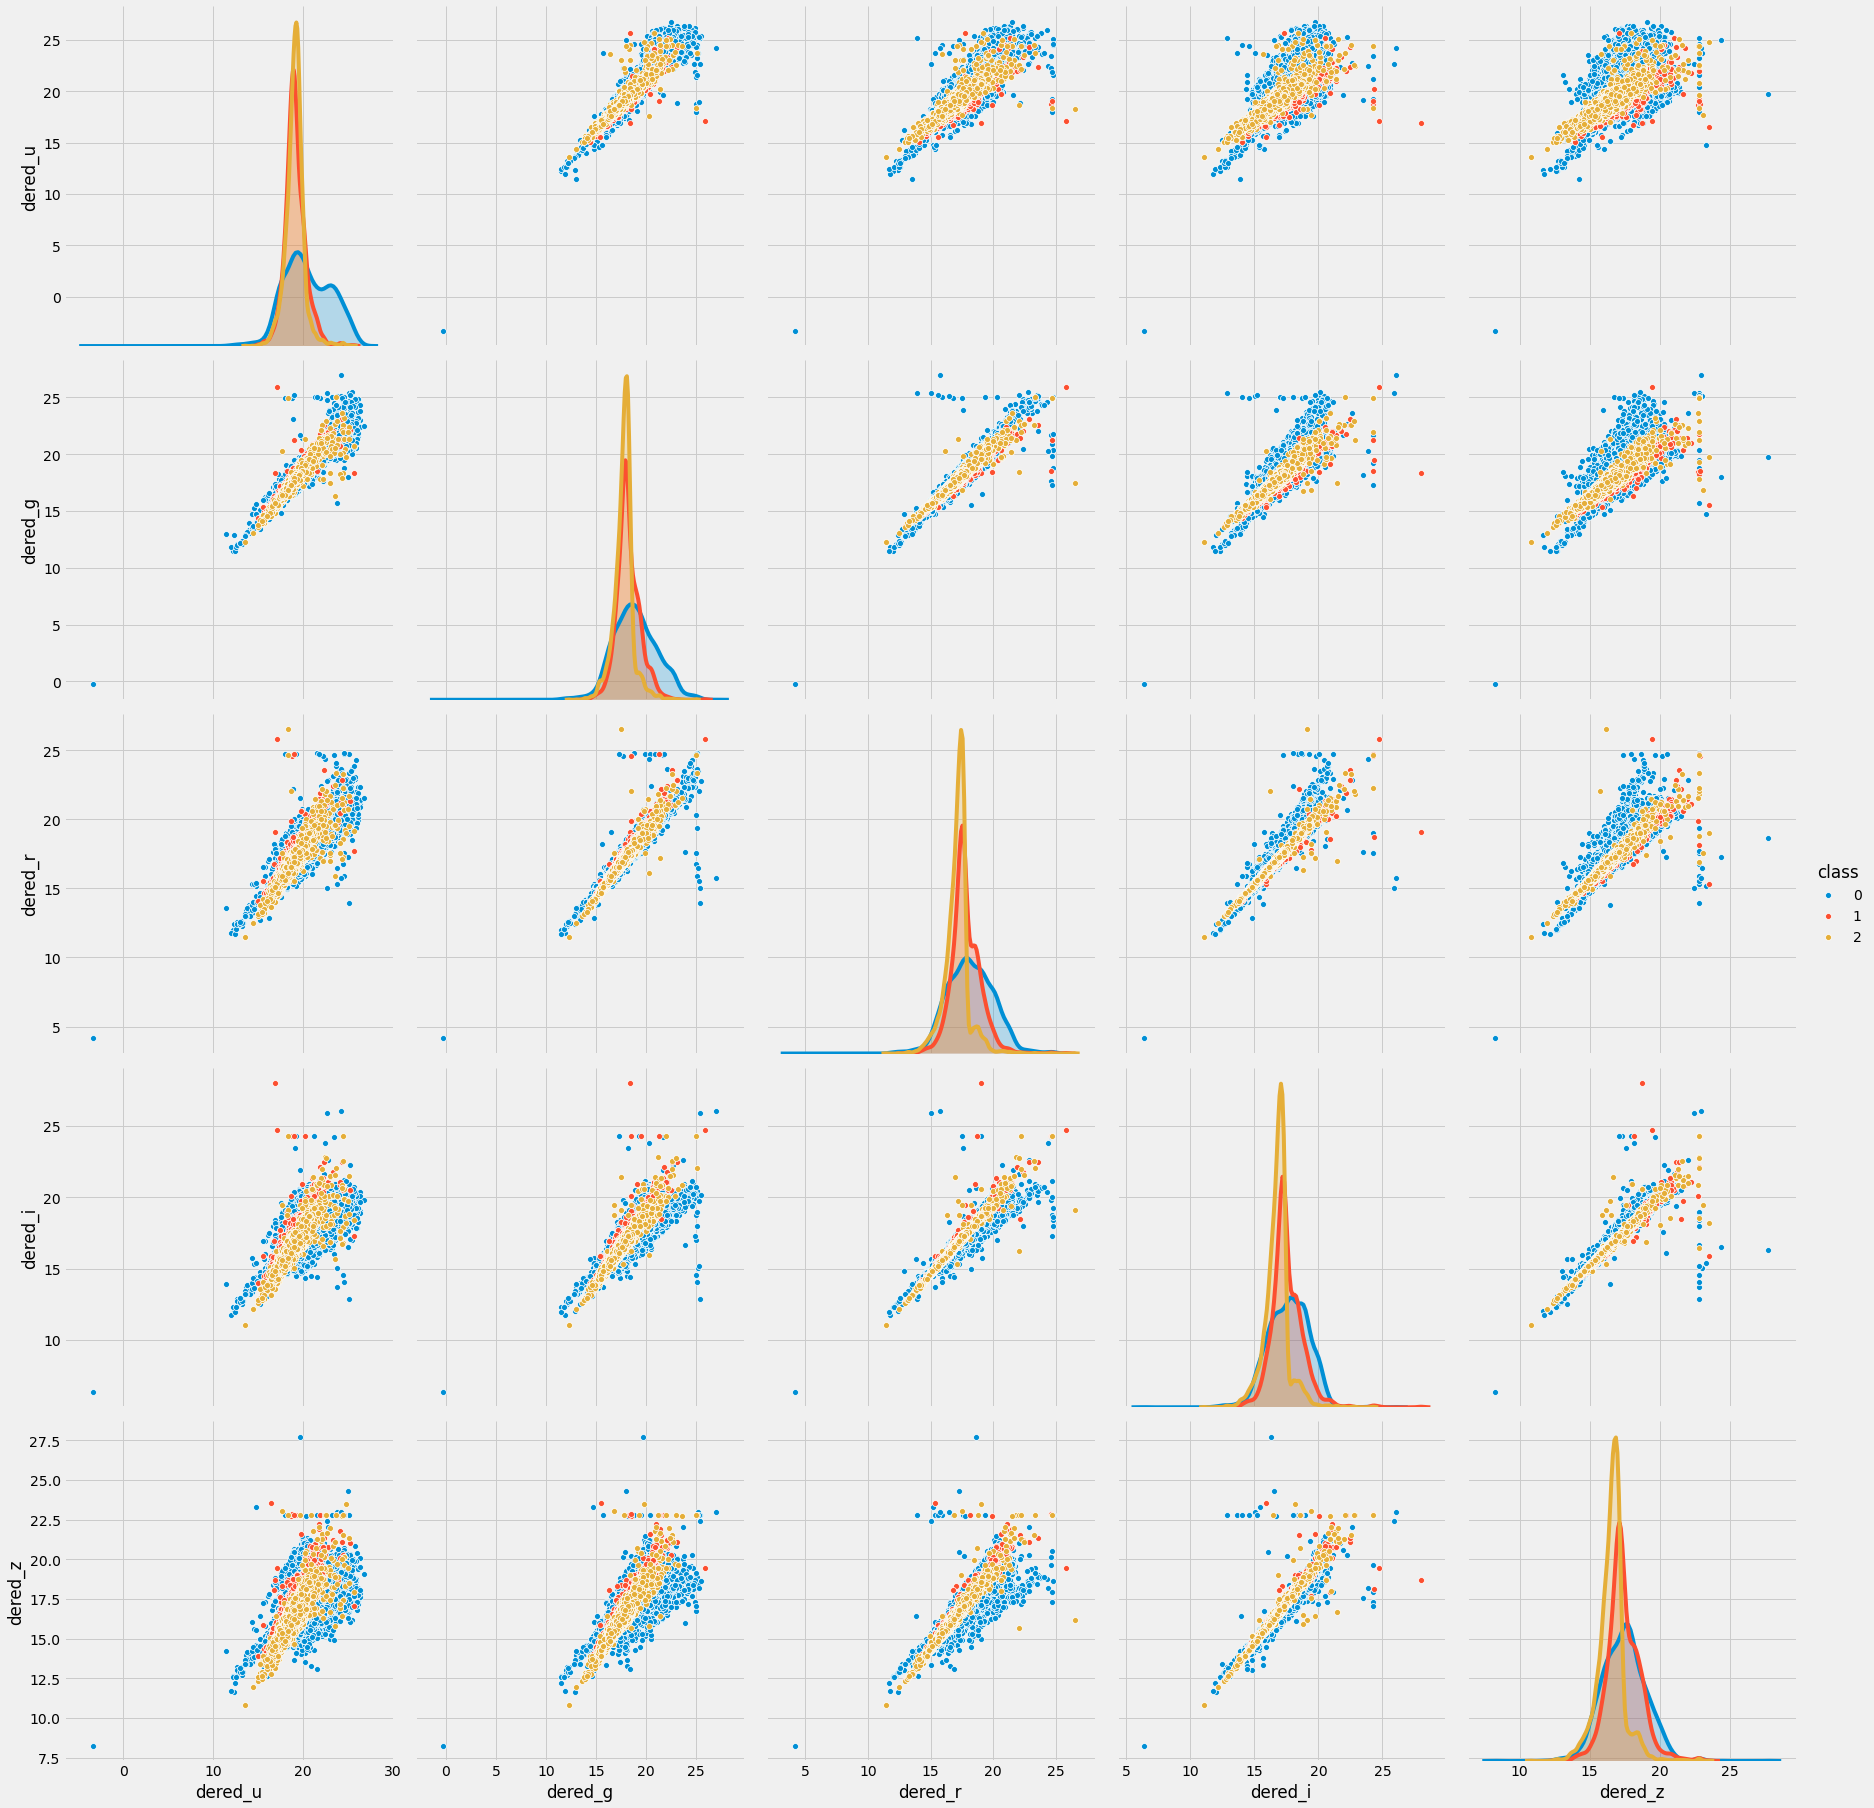

In [22]:
sns.pairplot(data=trn_sample, vars=['dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z'], hue='class', size=5)

아래는 `airmass_u`, `airmass_g`, `airmass_r`, `airmass_i`, `airmass_z` 열과 `class`열에 대해 `pairplot()`을 적용한 예시입니다. 

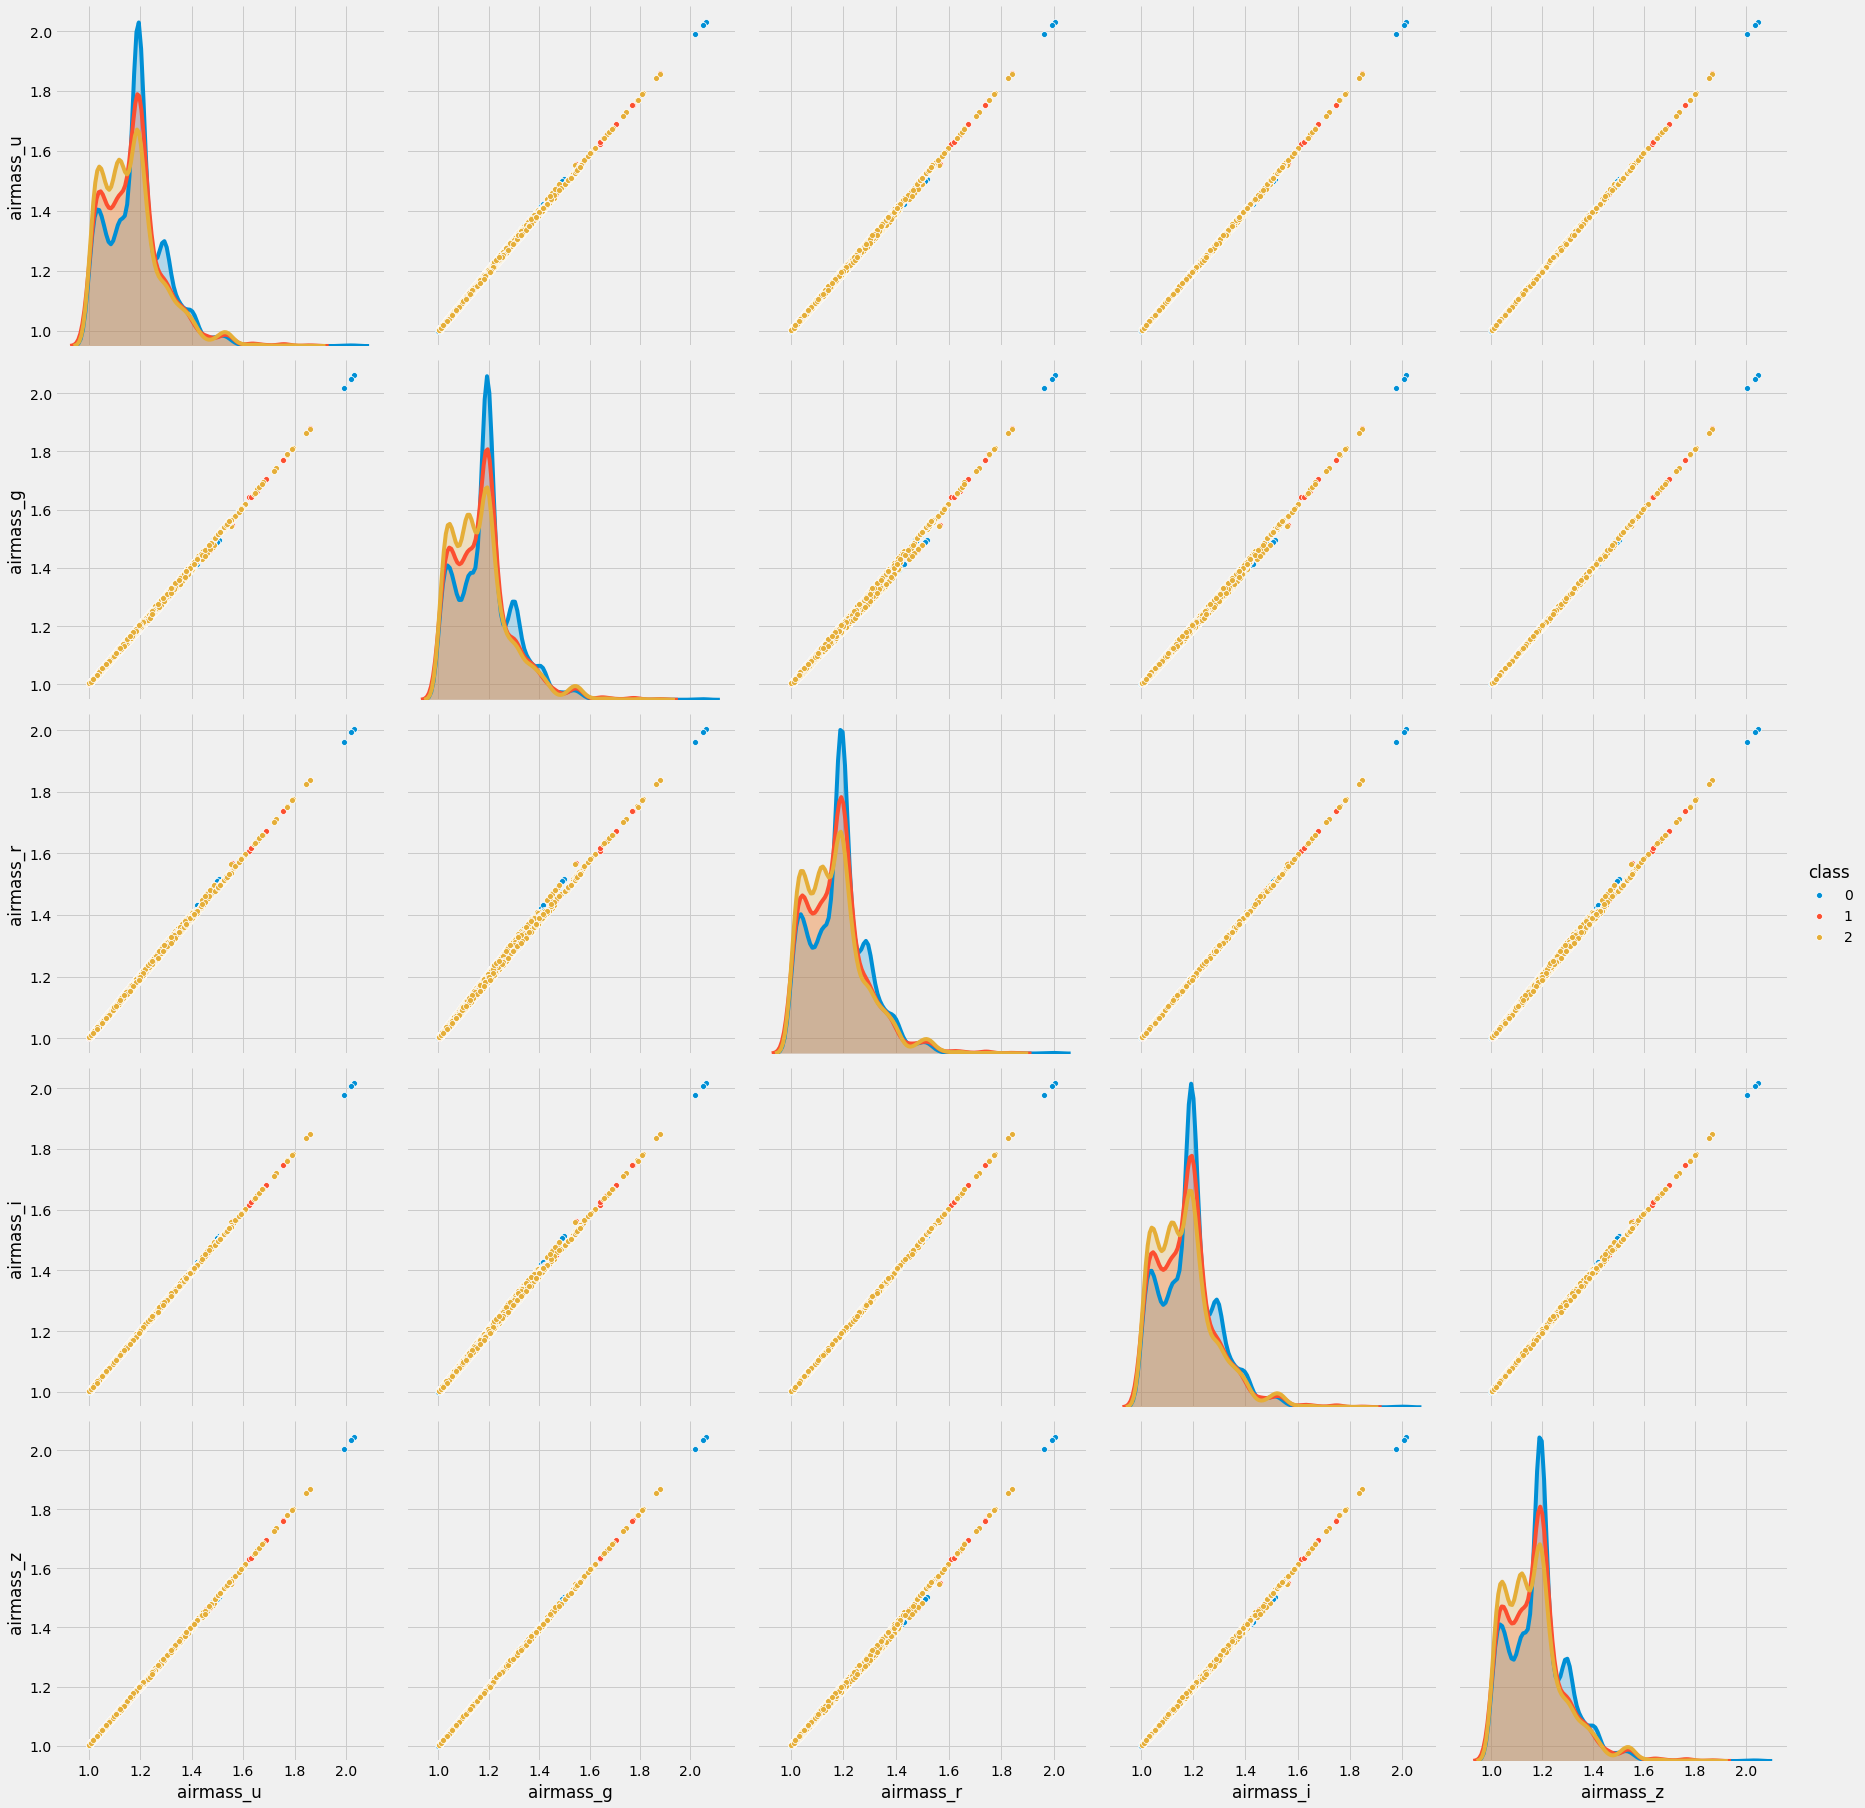

In [23]:
sns.pairplot(data=trn_sample, vars=['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z'], hue='class', size=5)

`airmass`로 시작하는 열은 특이한 점이 5개의 열간의 값의 분포가 거의 일치합니다. 즉 5개의 열이 모두 같은 정보를 저장하고 있기 때문에 이 경우 하나의 열만 필요하고 나머지 열은 삭제해도 모델링에는 큰 영향을 주지 않겠구나라는 것을 시각화를 통해 한번에 확인할 수 있습니다. 

아래는 `u`, `dered_u`, `airmass_u`열과 `class`열 간의 관계를 `pairplot()`으로 시각화한 그림입니다. 

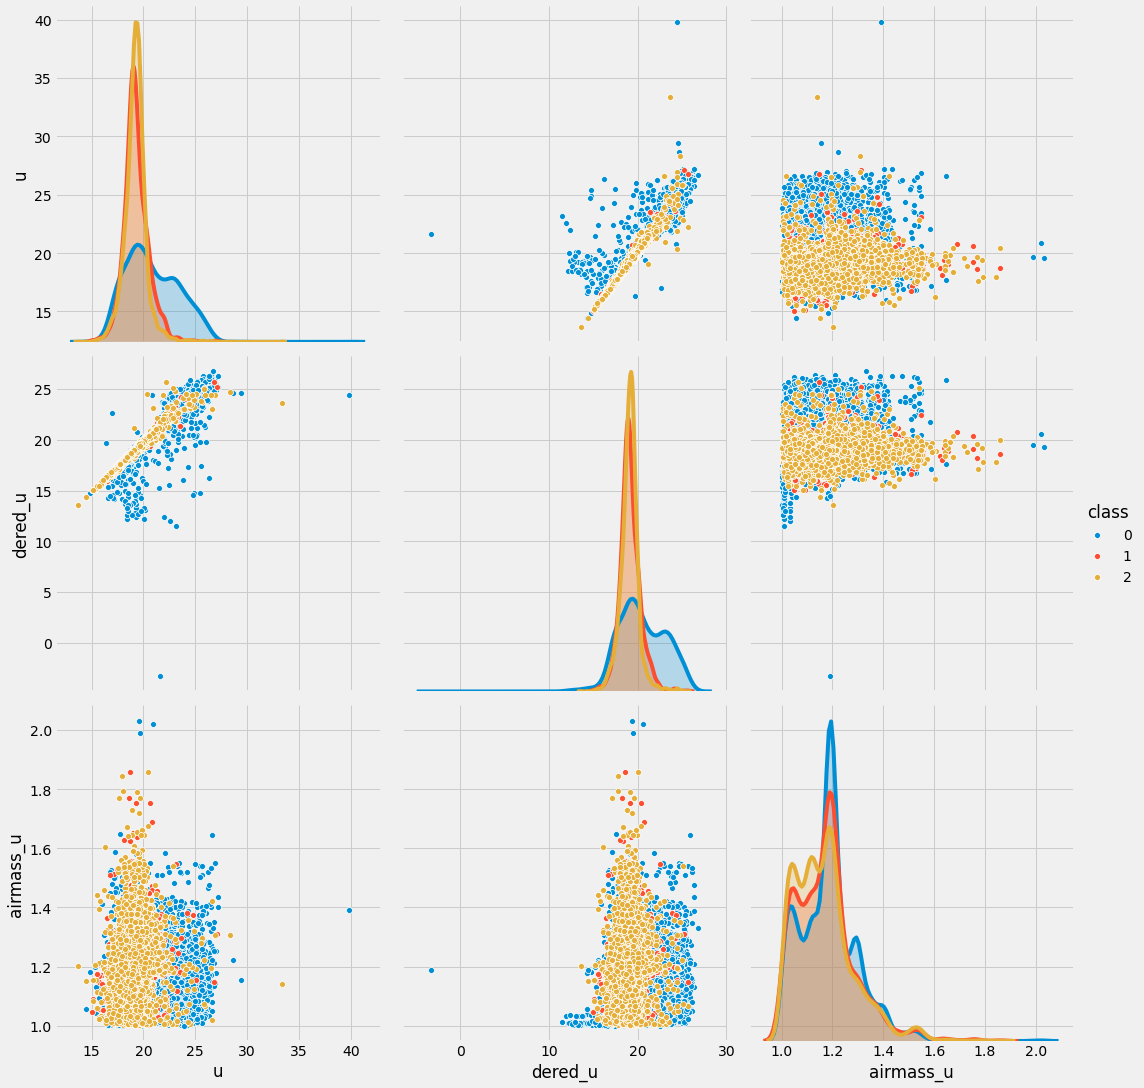

In [24]:
sns.pairplot(data=trn_sample, vars=['u', 'dered_u', 'airmass_u'], hue='class', size=5)

아래는 `redshit`, `nObserve`, `nDetect`열과 `class`열 간의 관계를 `pairplot()`으로 시각화한 그림입니다. 

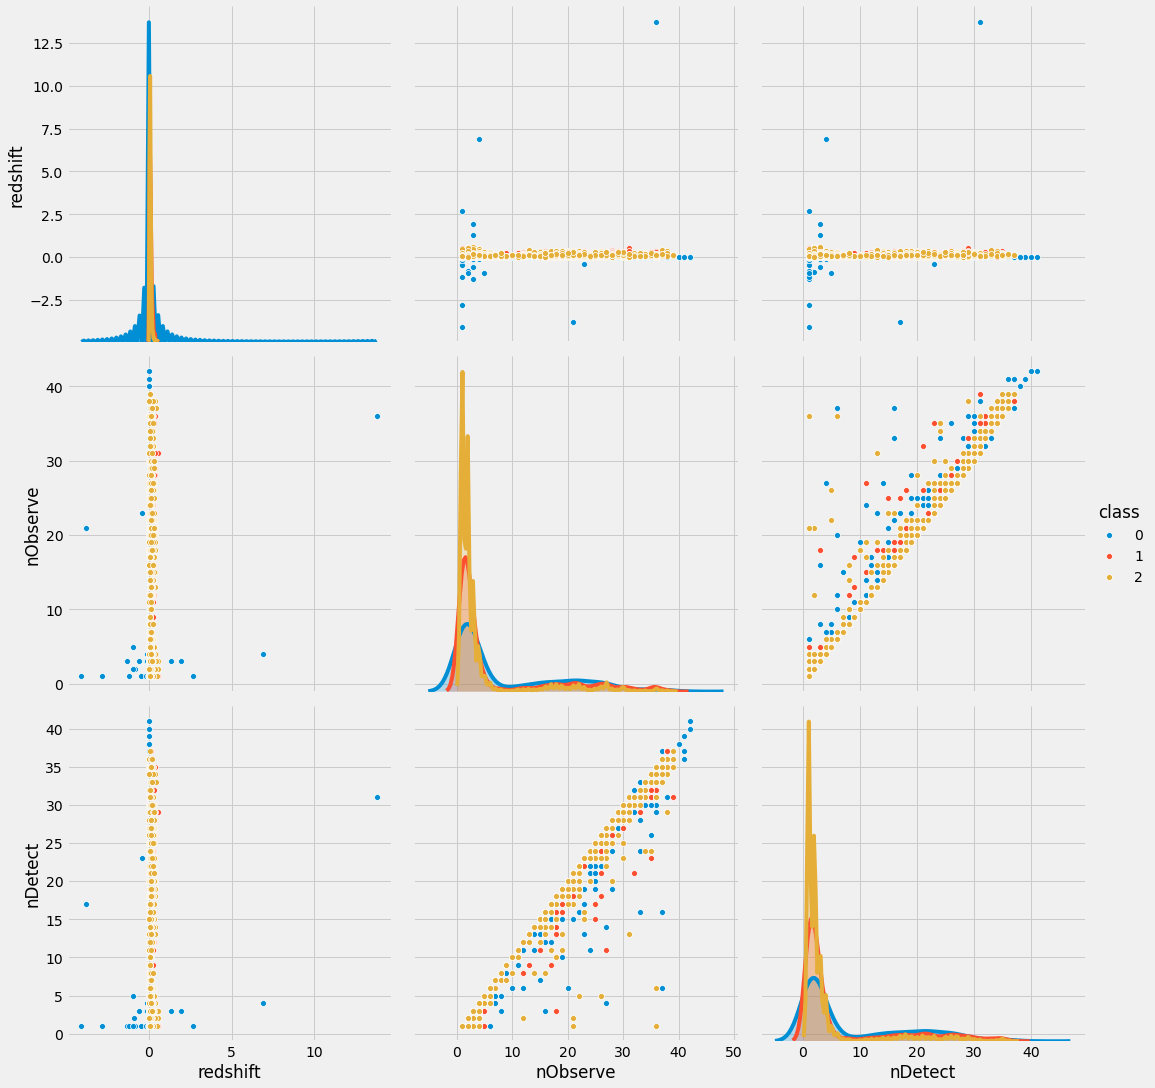

In [25]:
sns.pairplot(data=trn_sample, vars=['redshift', 'nObserve', 'nDetect'], hue='class', size=5)

Pandas에서 주로 사용하는 함수 중 하나로 `groupby()`가 있습니다. 특정 열의 값으로 데이터프레임을 그룹화 한 뒤 각 그룹에 대해 연산을 적용할 때 사용합니다. 예를 들어 아래의 예시는 `class`열에 있는 값인 0, 1, 2를 기준으로 그룹을 지은 후 각 그룹에 대한 평균값을 확인할 때 사용합니다.  

In [26]:
trn.groupby('class').mean()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
class,,,,,,,,,,,,,,,,,,
0,20.8648,19.2129,18.3938,17.8377,17.5528,-0.0024,20.5223,18.9474,18.2100,17.7011,17.4511,8.5553,8.3138,1.1864,1.1873,1.1856,1.1860,1.1868
1,19.2710,17.8776,17.8412,17.1333,17.0058,0.1055,19.1071,17.9267,17.7526,17.2447,17.1343,7.0451,6.7588,1.1776,1.1784,1.1770,1.1773,1.1780
2,19.2380,17.8746,17.2048,16.6790,16.3225,0.0918,19.0890,17.7590,17.1243,16.7084,16.3531,4.4425,4.3101,1.1671,1.1678,1.1666,1.1669,1.1674


실행 결과를 확인해 보면 0, 1, 2 각각의 `class`에 대해서 모든 열의 평균값을 확인할 수 있습니다. 그래서 한 줄의 코드로 특정 그룹에 대한 다양한 연산 결과를 확인해 볼 수 있어서 굉장히 유용한 기능입니다.

만약 결과를 그래프로 확인하고자 하면 `plot()`함수를 사용하면 됩니다. 아래 코드를 해석하면 우선 `trn.groupby('class').mean()`을 통해 그룹별 평균값을 구한 뒤 `T`를 통해 행과 열을 반대로 바꾼 전치행렬을 구합니다. 해당 작업은 시각화를 하기 위한 보조 작업입니다. 그리고 나서 `plot(kind=barh)`함수를 통해 막대그래프를 그릴 수 있습니다. 

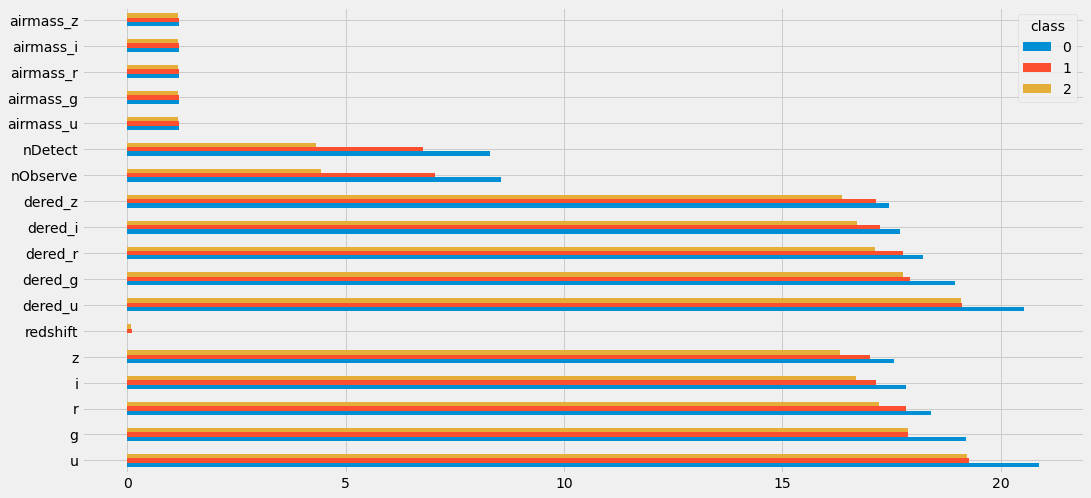

In [27]:
trn.groupby('class').mean().T.plot(kind='barh')

위의 시각화를 해석해보면 `airmass`로 시작하는 컬럼은 평균값이 모두 같은 것을 볼 수 있습니다. 즉, 하나의 열만 남겨두고 나머지는 삭제해도 됨을 확인할 수 있습니다. 또한 다른 열을 통해 일반적으로 `class`가 0일 때 평균값이 높고 2일 때 평균값이 낮은 것을 확인할 수 있습니다. 

### 시험 데이터 로드

지금 부터는 피쳐를 변환하고 새로운 피쳐를 생성하는 것을 실습해보겠습니다. 학습 데이터와 시험 데이터에 공통적으로 피쳐 변화을 진행하고 새로운 피쳐를 생성해두기 위해 아래 코드를 통해 시험 데이터를 불러오겠습니다. 

In [28]:
tst = pd.read_csv(tst_file, index_col=0)
print(tst.shape)
tst.head()

(80000, 18)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
id,,,,,,,,,,,,,,,,,,
320000,19.1431,18.0172,17.4733,17.1144,16.9263,1.2130e-01,19.0750,17.9550,17.4308,17.0838,16.9087,1,1,1.1563,1.1515,1.1613,1.1588,1.1539
320001,18.7409,17.1705,16.3691,15.9865,15.7307,-6.6907e-05,15.0703,14.3098,14.3901,14.5160,14.6372,2,2,1.0076,1.0074,1.0080,1.0078,1.0075
320002,19.2980,17.8803,17.2221,16.8096,16.6352,1.1001e-01,19.1004,17.7726,17.1460,16.7497,16.5689,1,1,1.3809,1.3905,1.3715,1.3761,1.3856
320003,18.0775,17.1569,16.9041,16.8118,16.7955,2.9697e-05,17.9729,17.0735,16.8470,16.7700,16.7668,1,1,1.1408,1.1408,1.1409,1.1408,1.1408
320004,17.8325,16.7646,16.2135,15.8722,15.6621,6.8471e-02,17.7545,16.6794,16.1563,15.8315,15.6433,2,2,1.1110,1.1077,1.1145,1.1127,1.1093


### 학습/시험 데이터 결합

In [29]:
df = pd.concat([trn, tst], axis=0)
print(df.shape)
df.tail()

(400000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
399995,19.6734,18.6617,18.2708,18.1225,18.0627,-0.0003,19.3361,18.3933,18.0860,17.9861,17.9670,17,17,1.1858,1.1863,1.1855,1.1857,1.1861,NaN
399996,21.5229,20.7283,20.6087,21.0049,20.8458,0.0655,21.3993,20.6399,20.5451,20.9507,20.7827,8,4,1.2850,1.2908,1.2793,1.2821,1.2878,NaN
399997,19.3991,18.2411,18.1605,18.1978,18.2018,-0.0008,18.9136,17.8753,17.9047,18.0043,18.0400,1,1,1.1885,1.1886,1.1885,1.1885,1.1885,NaN
399998,18.8997,17.6009,17.1329,16.8223,16.5946,0.0428,18.7715,17.4880,17.0557,16.7660,16.5585,17,17,1.1804,1.1813,1.1797,1.1800,1.1809,NaN
399999,20.7587,20.4252,20.5362,20.7729,20.9698,0.0003,20.4958,20.2181,20.3939,20.6696,20.9085,5,5,1.1832,1.1775,1.1889,1.1860,1.1803,NaN


피처를 한번에 처리해주기 위해 학습 데이터와 시험 데이터 결합을 `pd.concat()`함수를 활용해 진행하겠습니다. `axis`에 0을 주면 위 아래로 데이터프레임을 붙여서 결합한다는 의미이며 1을 입력하면 좌우로 데이터프레임을 붙여서 결합한다는 뜻입니다. 

결합한 데이터를 `df`변수에 저장하고 `shape`를 확인해보면 총 40만개의 행이 존재함을 알 수 있습니다. 

`tail()`함수를 통해 가장 아래 5개의 행을 확인해보면 `class`열에 결측값인 NaN이 존재함을 알 수 있습니다. 학습 데이터에는 `class`값이 존재하지만 시험 데이터의 `class`는 예측을 해야 하는 대상이기 때문에 값이 존재하지 않습니다. `concat()`을 하는 과정에서 NaN값이 들어간 것을 확인할 수 있습니다. 하지만 데이터 처리를 하기 위해선 NaN값을 특정 값으로 대치를 해야 합니다. 그래서 아래 코드를 활용해 NaN값을 -1로 대치해보겠습니다.  

In [30]:
df.fillna(-1, inplace=True)
df.tail()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
399995,19.6734,18.6617,18.2708,18.1225,18.0627,-0.0003,19.3361,18.3933,18.0860,17.9861,17.9670,17,17,1.1858,1.1863,1.1855,1.1857,1.1861,-1.0
399996,21.5229,20.7283,20.6087,21.0049,20.8458,0.0655,21.3993,20.6399,20.5451,20.9507,20.7827,8,4,1.2850,1.2908,1.2793,1.2821,1.2878,-1.0
399997,19.3991,18.2411,18.1605,18.1978,18.2018,-0.0008,18.9136,17.8753,17.9047,18.0043,18.0400,1,1,1.1885,1.1886,1.1885,1.1885,1.1885,-1.0
399998,18.8997,17.6009,17.1329,16.8223,16.5946,0.0428,18.7715,17.4880,17.0557,16.7660,16.5585,17,17,1.1804,1.1813,1.1797,1.1800,1.1809,-1.0
399999,20.7587,20.4252,20.5362,20.7729,20.9698,0.0003,20.4958,20.2181,20.3939,20.6696,20.9085,5,5,1.1832,1.1775,1.1889,1.1860,1.1803,-1.0


`class`에는 0, 1, 2가 존재하기 때문에 `class`에 없는 값인 -1로 결측값을 대치하기 위해 `fillna()`함수에 -1을 입력으로 줍니다. 

df를 확인해보면 `class`에 있던 결측값이 -1로 대치된 것을 확인할 수 있습니다. 

### 피쳐 변환

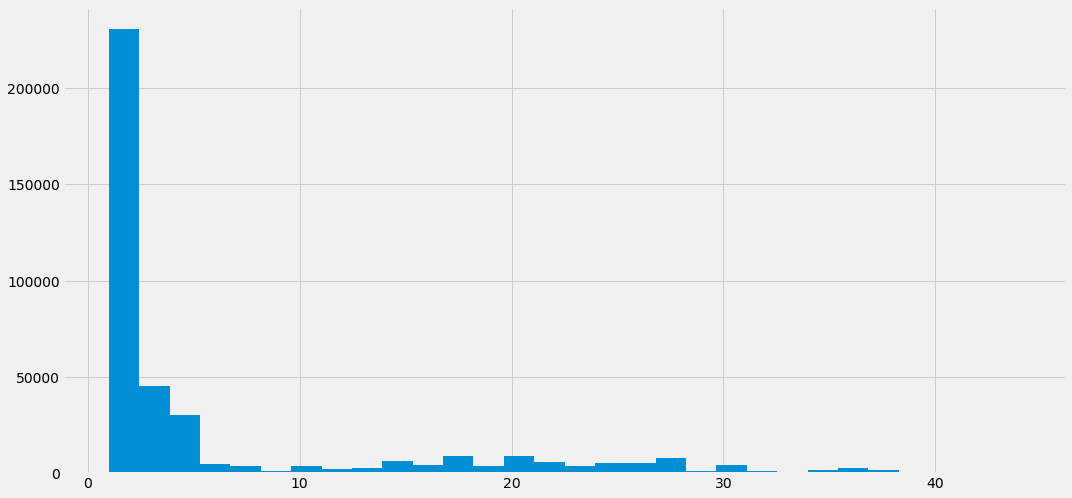

In [31]:
df['nObserve'].hist(bins=30)

In [32]:
df['nObserve'] = df['nObserve'].apply(np.log1p)

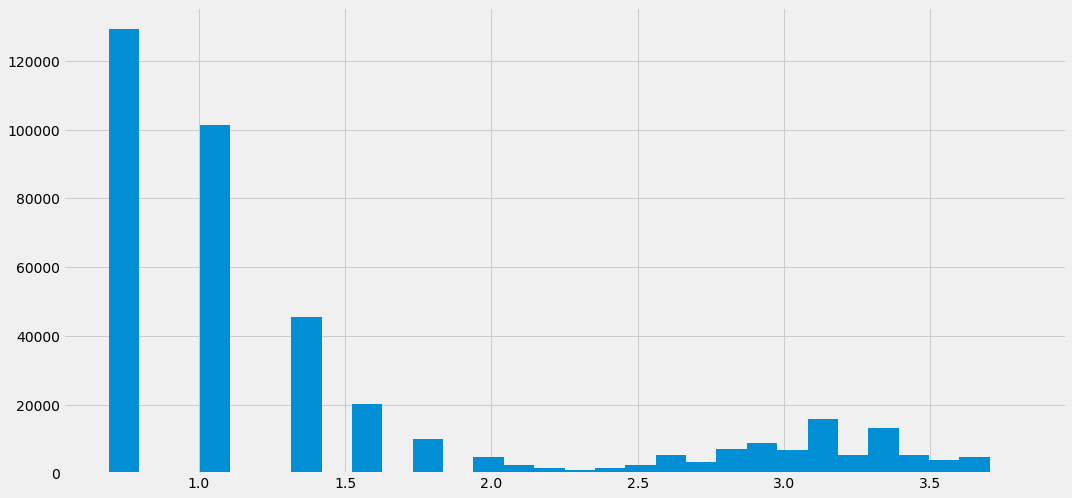

In [33]:
df['nObserve'].hist(bins=30)

### 피쳐 생성

In [34]:
df['d_dered_u'] = df['dered_u'] - df['u']
df['d_dered_g'] = df['dered_g'] - df['g']
df['d_dered_r'] = df['dered_r'] - df['r']
df['d_dered_i'] = df['dered_i'] - df['i']
df['d_dered_z'] = df['dered_z'] - df['z']
df['d_dered_rg'] = df['dered_r'] - df['dered_g']
df['d_dered_ig'] = df['dered_i'] - df['dered_g']
df['d_dered_zg'] = df['dered_z'] - df['dered_g']
df['d_dered_ri'] = df['dered_r'] - df['dered_i']
df['d_dered_rz'] = df['dered_r'] - df['dered_z']
df['d_dered_iz'] = df['dered_i'] - df['dered_z']
df['d_obs_det'] = df['nObserve'] - df['nDetect']
print(df.shape)
df.head()

(400000, 31)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_rg,d_dered_ig,d_dered_zg,d_dered_ri,d_dered_rz,d_dered_iz,d_obs_det
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,18,1.1898,1.1907,1.1890,1.1894,1.1902,0.0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,-1.3027,-2.6257,-3.3488,1.3230,2.0462,0.7232,-15.0556
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,1,1.2533,1.2578,1.2488,1.2510,1.2555,1.0,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,-0.5931,-0.7683,-0.8698,0.1751,0.2767,0.1016,-0.3069
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,2,1.0225,1.0241,1.0210,1.0217,1.0233,0.0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,-0.2466,-0.3649,-0.3905,0.1183,0.1440,0.0257,-0.9014
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,3,1.2054,1.2061,1.2049,1.2051,1.2057,0.0,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,-0.9074,-1.2000,-1.4395,0.2926,0.5321,0.2395,-1.3906
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,12,1.1939,1.1943,1.1937,1.1938,1.1941,0.0,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,-1.5709,-2.2436,-2.5579,0.6727,0.9871,0.3144,-9.3609


### 피쳐 삭제

In [35]:
df.corr().style.background_gradient()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_rg,d_dered_ig,d_dered_zg,d_dered_ri,d_dered_rz,d_dered_iz,d_obs_det
u,1.0000,0.0543,0.8159,0.0194,0.0145,-0.0085,0.9347,0.0904,0.7810,0.0389,0.0231,0.2398,0.2211,0.0768,0.0765,0.0769,0.0768,0.0767,-0.2378,-0.2140,-0.0061,-0.1284,-0.0016,0.0016,-0.0182,-0.0357,-0.0196,0.0124,0.0094,0.0020,-0.2174
g,0.0543,1.0000,0.0556,0.5913,0.5315,-0.0003,0.0525,0.9987,0.0538,0.7074,0.4478,0.0130,0.0127,0.0027,0.0027,0.0028,0.0027,0.0027,-0.0142,-0.0069,-0.9977,-0.0063,-0.4753,-0.3233,-0.9986,-0.0021,-0.0011,-0.7049,-0.4458,0.0001,-0.0126
r,0.8159,0.0556,1.0000,0.0256,0.0199,-0.0055,0.8037,0.0953,0.9684,0.0530,0.0330,0.2171,0.1954,0.0772,0.0768,0.0774,0.0773,0.0770,-0.2346,-0.0620,-0.0025,-0.1127,-0.0005,0.0036,-0.0057,-0.0207,-0.0110,0.0106,0.0073,0.0007,-0.1915
i,0.0194,0.5913,0.0256,1.0000,0.8991,-0.0001,0.0195,0.5901,0.0252,0.9878,0.6254,0.0054,0.0061,-0.0002,-0.0003,-0.0001,-0.0002,-0.0002,-0.0079,-0.0005,-0.5904,-0.0010,-0.9903,-0.6738,-0.5907,0.8047,0.4028,-0.9876,-0.6247,0.0000,-0.0061
z,0.0145,0.5315,0.0199,0.8991,1.0000,-0.0002,0.0144,0.5303,0.0196,0.8881,0.7096,0.0042,0.0053,-0.0002,-0.0002,-0.0001,-0.0002,-0.0002,-0.0083,-0.0009,-0.5309,-0.0007,-0.8904,-0.7360,-0.5311,0.7237,0.5270,-0.8881,-0.7092,-0.1904,-0.0054
redshift,-0.0085,-0.0003,-0.0055,-0.0001,-0.0002,1.0000,-0.0080,-0.0002,-0.0028,-0.0001,-0.0001,-0.0092,-0.0067,0.0011,0.0011,0.0011,0.0011,0.0011,0.0484,0.0016,0.0005,0.0106,0.0002,0.0001,-0.0001,0.0001,-0.0000,-0.0001,-0.0000,0.0001,0.0064
dered_u,0.9347,0.0525,0.8037,0.0195,0.0144,-0.0080,1.0000,0.0969,0.8392,0.0423,0.0249,0.2337,0.2172,0.0889,0.0885,0.0892,0.0891,0.0887,-0.2120,0.1470,0.0068,0.1521,0.0013,0.0036,-0.0194,-0.0374,-0.0209,0.0128,0.0100,0.0025,-0.2138
dered_g,0.0904,0.9987,0.0953,0.5901,0.5303,-0.0002,0.0969,1.0000,0.0990,0.7072,0.4476,0.0222,0.0212,0.0071,0.0070,0.0072,0.0071,0.0070,-0.0219,0.0149,-0.9928,0.0158,-0.4733,-0.3218,-0.9957,-0.0037,-0.0020,-0.7018,-0.4437,0.0002,-0.0209
dered_r,0.7810,0.0538,0.9684,0.0252,0.0196,-0.0028,0.8392,0.0990,1.0000,0.0549,0.0340,0.2100,0.1899,0.0848,0.0843,0.0852,0.0850,0.0845,-0.2139,0.1329,0.0065,0.1388,0.0018,0.0048,-0.0065,-0.0217,-0.0117,0.0108,0.0076,0.0010,-0.1863
dered_i,0.0389,0.7074,0.0530,0.9878,0.8881,-0.0001,0.0423,0.7072,0.0549,1.0000,0.6331,0.0118,0.0119,0.0026,0.0026,0.0027,0.0027,0.0026,-0.0136,0.0080,-0.7048,0.0082,-0.9566,-0.6508,-0.7056,0.7044,0.3526,-0.9978,-0.6312,0.0000,-0.0119


In [36]:
df.drop(['airmass_z', 'airmass_i', 'airmass_r', 'airmass_g', 'u', 'g', 'r', 'i', 'nDetect', 'd_dered_rg', 'd_dered_ri'], 
        axis=1, inplace=True)
print(df.shape)
df.head()

(400000, 20)


,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
id,,,,,,,,,,,,,,,,,,,,
0,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,1.1898,0.0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,-2.6257,-3.3488,2.0462,0.7232,-15.0556
1,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,1.2533,1.0,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,-0.7683,-0.8698,0.2767,0.1016,-0.3069
2,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,1.0225,0.0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,-0.3649,-0.3905,0.1440,0.0257,-0.9014
3,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,1.2054,0.0,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,-1.2000,-1.4395,0.5321,0.2395,-1.3906
4,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,1.1939,0.0,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,-2.2436,-2.5579,0.9871,0.3144,-9.3609


### 새로운 학습 데이터 파일 저장

In [37]:
df.to_csv(feature_file)

In [38]:
!ls -alF ../input/

total 450952
drwxr-xr-x@  6 jeong  staff        192 Sep  7 23:54 ./
drwxr-xr-x  13 jeong  staff        416 Sep  6 22:22 ../
-rw-r--r--   1 jeong  staff  132588144 Sep  7 23:54 feature.csv
-rw-rw-r--@  1 jeong  staff     800010 Jul 26 04:35 sample_submission.csv
-rw-rw-r--@  1 jeong  staff   18936246 Jul 26 04:35 test.csv
-rw-rw-r--@  1 jeong  staff   76278443 Jul 26 04:35 train.csv


In [41]:
feature = pd.read_csv(feature_file, index_col=0)
print(feature.shape)
feature.head()

(400000, 20)


,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
id,,,,,,,,,,,,,,,,,,,,
0,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,1.1898,0.0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,-2.6257,-3.3488,2.0462,0.7232,-15.0556
1,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,1.2533,1.0,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,-0.7683,-0.8698,0.2767,0.1016,-0.3069
2,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,1.0225,0.0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,-0.3649,-0.3905,0.1440,0.0257,-0.9014
3,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,1.2054,0.0,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,-1.2000,-1.4395,0.5321,0.2395,-1.3906
4,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,1.1939,0.0,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,-2.2436,-2.5579,0.9871,0.3144,-9.3609


In [45]:
feature.loc[feature['class'] != -1].corr().style.background_gradient()

,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
z,1.0000,-0.0002,0.0140,0.5428,0.0189,0.9086,0.9190,0.0039,-0.0015,-0.0100,-0.0009,-0.5432,-0.0005,-0.9109,-0.8693,0.7406,0.7466,-0.9186,-0.3906,-0.0053
redshift,-0.0002,1.0000,-0.0076,-0.0002,-0.0030,-0.0001,-0.0002,-0.0100,0.0014,0.0738,0.0049,0.0006,0.0134,0.0002,0.0001,0.0000,-0.0001,0.0001,0.0002,0.0073
dered_u,0.0140,-0.0076,1.0000,0.0869,0.8405,0.0380,0.0232,0.2334,0.0883,-0.3379,0.1494,0.0063,0.1565,0.0011,0.0008,-0.0335,-0.0235,0.0117,0.0051,-0.2135
dered_g,0.5428,-0.0002,0.0869,1.0000,0.0887,0.7072,0.5001,0.0197,0.0059,-0.0304,0.0135,-0.9943,0.0144,-0.4739,-0.4702,-0.0030,-0.0021,-0.4966,0.0005,-0.0188
dered_r,0.0189,-0.0030,0.8405,0.0887,1.0000,0.0490,0.0315,0.2101,0.0839,-0.3413,0.1347,0.0059,0.1418,0.0017,0.0013,-0.0196,-0.0150,0.0100,0.0045,-0.1863
dered_i,0.9086,-0.0001,0.0380,0.7072,0.0490,1.0000,0.7075,0.0104,0.0018,-0.0183,0.0072,-0.7053,0.0075,-0.9570,-0.9497,0.7049,0.4071,-0.7058,0.0002,-0.0108
dered_z,0.9190,-0.0002,0.0232,0.5001,0.0315,0.7075,1.0000,0.0067,-0.0003,-0.0144,0.0043,-0.4991,0.0044,-0.6772,-0.6040,0.4990,0.8649,-0.9991,-0.7066,-0.0079
nObserve,0.0039,-0.0100,0.2334,0.0197,0.2101,0.0104,0.0067,1.0000,0.2499,-0.2363,-0.0251,-0.0005,-0.0251,0.0006,0.0006,-0.0050,-0.0037,0.0020,0.0010,-0.9364
airmass_u,-0.0015,0.0014,0.0883,0.0059,0.0839,0.0018,-0.0003,0.2499,1.0000,-0.0766,0.0306,0.0032,0.0322,0.0030,0.0026,-0.0034,-0.0037,0.0038,0.0022,-0.2476
class,-0.0100,0.0738,-0.3379,-0.0304,-0.3413,-0.0183,-0.0144,-0.2363,-0.0766,1.0000,0.1262,0.0049,0.1293,0.0026,0.0021,0.0047,0.0010,0.0002,0.0021,0.2133
